# Dahlquist's test for the stability analysis 

Dahlquist's test is a method used for the stability analysis of numerical methods applied to ordinary differential equations (ODEs). It was introduced by Åke Björck and Germund Dahlquist. The main idea is to analyze the stability of a numerical method by applying it to a simple linear test equation with known solutions.

The linear test equation typically takes the form:
$$ y' = \lambda y $$

where \( y' \) is the derivative of \( y \) with respect to time, and \( $\lambda$ \) is a complex constant. This test equation is chosen because it represents the simplest form of a linear ordinary differential equation with an exponential solution.

When applying a numerical method to this test equation, it leads to a difference equation of the form:
$$ y_{k+1} = R(h \lambda) y_k $$

Here, \( h \) is the step size, \( $\lambda h$ \) is often denoted as \( $\mu $\), and \( R(h $\lambda) $\) is the stability function associated with the numerical method. The stability function characterizes how errors in the numerical solution behave over time.

The stability of the method is analyzed by examining the behavior of the stability function for different values of \($ \mu $\) in the complex plane. A method is considered stable if the absolute value of the stability function is bounded by 1 for all values of  $\mu$  in the left-half complex plane.

Dahlquist's test is particularly useful for one-step methods, such as explicit and implicit Euler methods, Runge-Kutta methods, and other numerical integrators. By studying the stability behavior through this test, researchers can gain insights into the numerical method's stability properties and choose appropriate methods for solving specific ODEs.


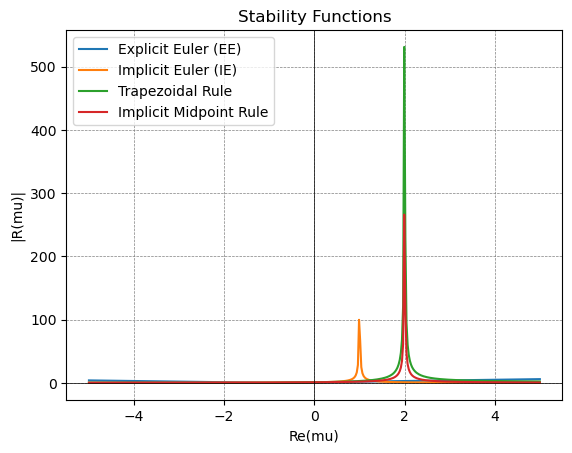

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stability_function(R, label):
    mu = np.linspace(-5, 5, 400)
    plt.plot(mu, np.abs(R(mu)), label=label)

# Stability functions
R_EE = lambda mu: 1 + mu
R_IE = lambda mu: 1 / (1 - mu)
R_Trapezoidal = lambda mu: (1 + 0.5 * mu) / (1 - 0.5 * mu)
R_Implicit_Midpoint = lambda mu: 1 / (1 - 0.5 * mu)

# Plotting
plot_stability_function(R_EE, 'Explicit Euler (EE)')
plot_stability_function(R_IE, 'Implicit Euler (IE)')
plot_stability_function(R_Trapezoidal, 'Trapezoidal Rule')
plot_stability_function(R_Implicit_Midpoint, 'Implicit Midpoint Rule')

# Plot settings
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Stability Functions')
plt.xlabel('Re(mu)')
plt.ylabel('|R(mu)|')
plt.legend()
plt.show()


# Physics of Star : Lane-Emden Equation

The Lane-Emden equation is a mathematical model that describes the structure and evolution of stars. It is based on the assumption that the star is a self-gravitating, spherically symmetric, and polytropic gas, meaning that its pressure and density are related by a power law. The equation can be derived from the principles of mass conservation, hydrostatic equilibrium, and Poisson’s equation for the gravitational potential.

The Lane-Emden equation for the calculation of the internal structure of stars reads
$$
\frac{1}{z^2}\frac{d}{dz}\left(z^2\frac{dw}{dz}\right) + w^n = 0,
$$
where \(w\) denotes the dimensionless density
$$
\rho = \rho_c w^n,
$$
with the central density $\rho_c = \rho(0)$ in the star’s center, and $n = \frac{1}{\gamma - 1}$ is the polytropic index for a gas that obeys the polytropic equation of state $p = K\rho^{\gamma}$, $K = \text{const.}$.

The coordinate \(z\) denotes the dimensionless radius
$$
z = Ar,
$$
with
$$
A^2 = \frac{4\pi G}{(n+1)K}\rho_c^{1-\frac{1}{n}}.      
$$

The boundary conditions for the dimensionless Lane-Emden equation at the center of the star (at \(z = 0\)) are
$$
w = 1 \quad \text{and} \quad \frac{dw}{dz} = 0 \quad \text{at} \quad z = 0.
$$

Analytic solutions to the Lane-Emden equation are known for the following three cases:

\begin{align*}
n = 0 & : \quad w(z) = 1, \\
n = 1 & : \quad w(z) = \sin z/z, \\
n = 5 & : \quad w(z) = \frac{1}{(1 + z^2/3)^{1/2}}.
\end{align*}


The first case for \(n = 0\) corresponds to a sphere of constant density, and the case in which \(n = 1\) is of some relevance in modeling planetary interiors and brown dwarfs. However, \(n = 5\) leads to a model with infinite radius and finite mass.


The Lane-Emden equation is useful for studying the physics of stars, such as their stability, luminosity, and evolution. It can also be used to model other astrophysical objects, such as white dwarfs, neutron stars, and dark matter halos

Numerical solution of Lane Emden Equation has been done by transforming equaiton in another form . Substituting $\frac{dw}{dz}=\psi$ will into Lane Emden equation  initial value problem of two equation $$\frac{dw}{dz}=\psi $$ $$\frac{d\psi}{dz}=-( \frac{2}{z}\psi+w^n)$$ 

The boundary and initial conditions at the center of the star at \(z = 0\) read
$$
w = 1 \quad \text{and} \quad \psi = 0.
$$
Finally, by manipulating the Lane-Emden equation, we can calculate the total mass $(M^*)$ of a star with radius $(R^*)$ as:
$$
M^* = 4\pi \int_0^{R^*} \rho r^2 \, dr = \frac{4\pi\rho_c}{A^3}\int^{z_n}_0 w^n z^2 dz =  \frac{4\pi\rho_c}{A^3}(-z^2\psi)_{z_n}
$$
where \(w_n\) is related to \(w\) through the expression (6).

From this, we can relate the mean density $(\bar{\rho} = \frac{3M^*}{4\pi R^{*3}})$ to the central density \(\rho_c\) as:
$$
\frac{\bar{\rho}}{\rho_c}=(-\frac{3\psi}{z})_{z_n}
$$
which allows us to convert our dimensionless quantities to real units.


The boundary and initial conditions at the center of the star at $z = 0$ read
$w=1$,
$\psi = 0$.

/tmp/ipykernel_884671/2836487393.py:7: RuntimeWarning: invalid value encountered in scalar power
  dydxi = [z, -xi * z - w**n]


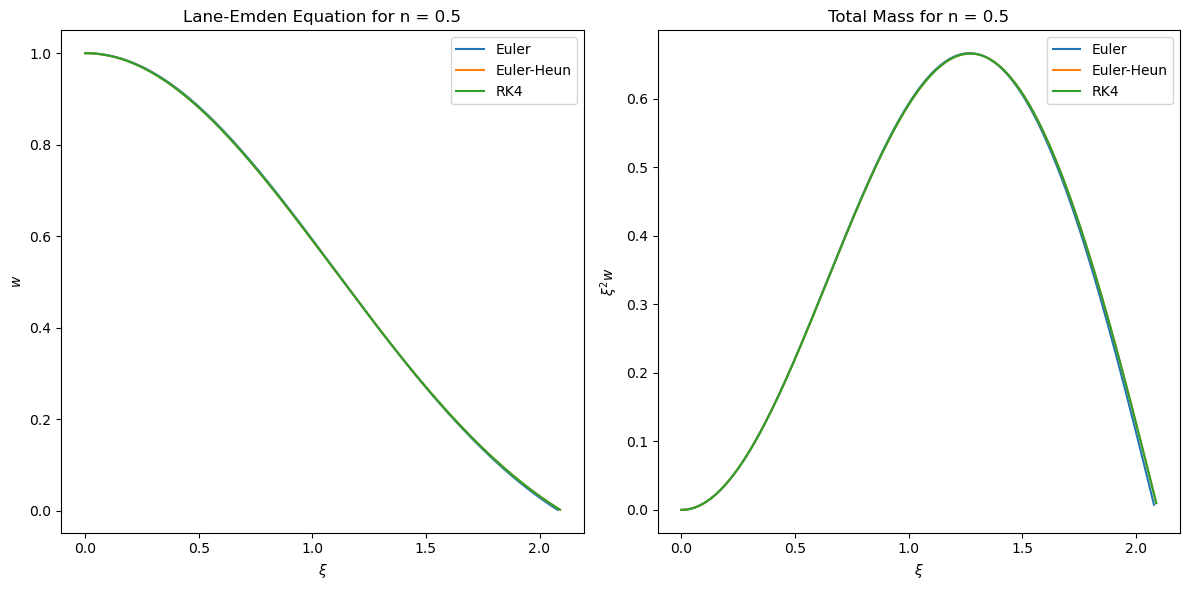

Total Mass (n=0.5):
Euler method: 77.51370211279968
Euler-Heun method: 77.92781542749296
RK4 method: 77.92977231326743
Central Density (n=0.5):
Euler method: -0.0008323494034832992
Euler-Heun method: -0.0010864466997281906
RK4 method: -0.0010871830252304085




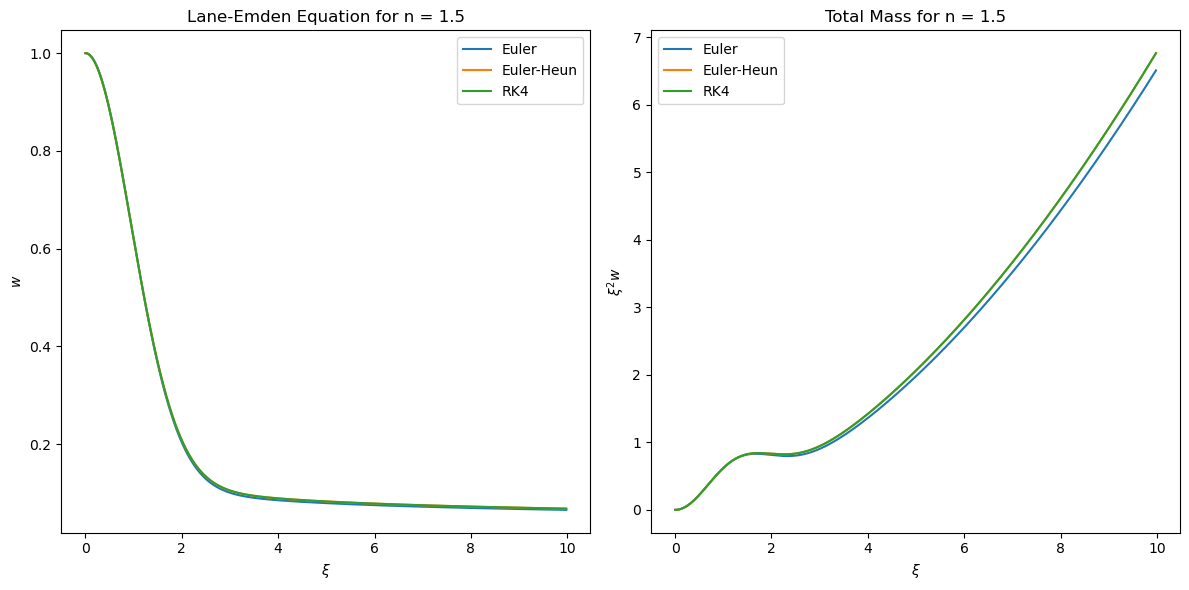

Total Mass (n=1.5):
Euler method: 1159.5767278665062
Euler-Heun method: 1205.3232062105699
RK4 method: 1205.3565561624393
Central Density (n=1.5):
Euler method: -0.0065493650903938735
Euler-Heun method: -0.006806457910586523
RK4 method: -0.006806641195423634




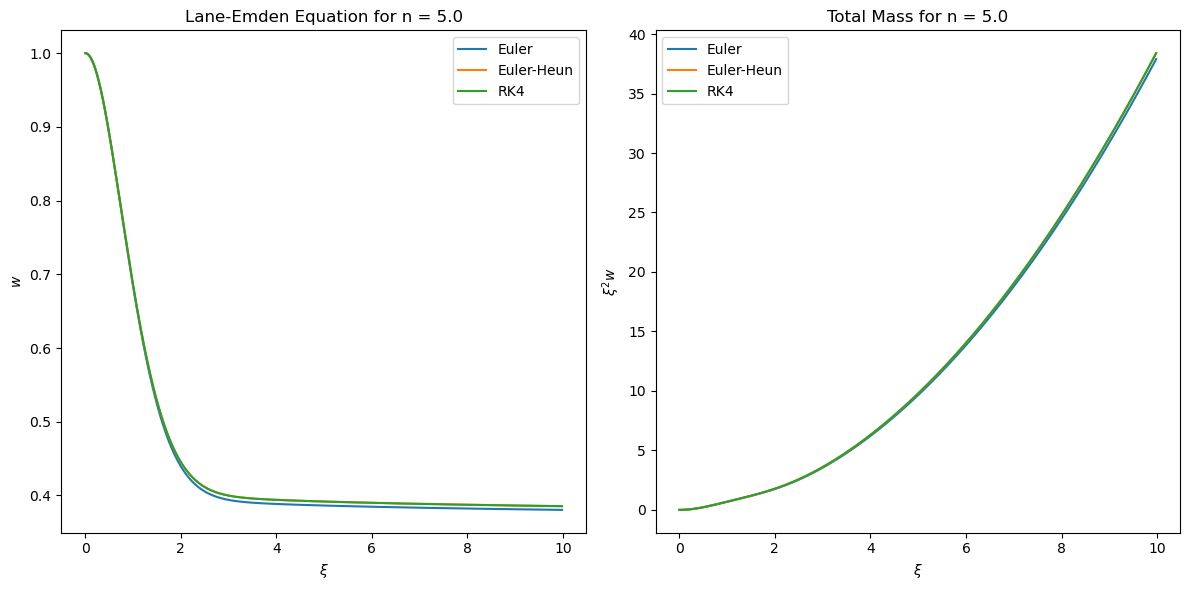

Total Mass (n=5.0):
Euler method: 1601.9981267009578
Euler-Heun method: 1623.648441168938
RK4 method: 1623.704921747472
Central Density (n=5.0):
Euler method: -0.03812120946820894
Euler-Heun method: -0.03862416016354416
RK4 method: -0.03862546585648675




In [11]:
    import numpy as np
    import matplotlib.pyplot as plt

    # Define the Lane-Emden equation as a system of first-order ODEs
    def lane_emden_equation(y, xi, n):
        w, z = y
        dydxi = [z, -xi * z - w**n]
        return dydxi

    # Numerical solution using Euler method
    def euler_method(n, h=0.01):
        xi_values = np.arange(0, 10, h)
        w_values = np.zeros_like(xi_values)
        z_values = np.zeros_like(xi_values)

        w_values[0] = 1.0  # Initial condition
        z_values[0] = 0.0  # Initial condition

        for i in range(1, len(xi_values)):
            dydxi = lane_emden_equation([w_values[i-1], z_values[i-1]], xi_values[i-1], n)
            w_values[i] = w_values[i-1] + h * dydxi[0]
            z_values[i] = z_values[i-1] + h * dydxi[1]

            # Check for the first root of w
            if w_values[i] * w_values[i-1] < 0:
                break

        return xi_values[:i], w_values[:i]

    # Numerical solution using Euler-Heun method
    def euler_heun_method(n, h=0.01):
        xi_values = np.arange(0, 10, h)
        w_values = np.zeros_like(xi_values)
        z_values = np.zeros_like(xi_values)

        w_values[0] = 1.0  # Initial condition
        z_values[0] = 0.0  # Initial condition

        for i in range(1, len(xi_values)):
            # Predictor step
            dydxi_pred = lane_emden_equation([w_values[i-1], z_values[i-1]], xi_values[i-1], n)
            w_pred = w_values[i-1] + h * dydxi_pred[0]
            z_pred = z_values[i-1] + h * dydxi_pred[1]

            # Corrector step
            dydxi_corr = lane_emden_equation([w_pred, z_pred], xi_values[i], n)
            w_values[i] = w_values[i-1] + 0.5 * h * (dydxi_pred[0] + dydxi_corr[0])
            z_values[i] = z_values[i-1] + 0.5 * h * (dydxi_pred[1] + dydxi_corr[1])

            # Check for the first root of w
            if w_values[i] * w_values[i-1] < 0:
                break

        return xi_values[:i], w_values[:i]

    # Numerical solution using RK4 method
    def runge_kutta_method(n, h=0.01):
        xi_values = np.arange(0, 10, h)
        w_values = np.zeros_like(xi_values)
        z_values = np.zeros_like(xi_values)

        w_values[0] = 1.0  # Initial condition
        z_values[0] = 0.0  # Initial condition

        for i in range(1, len(xi_values)):
            k1 = np.array(lane_emden_equation([w_values[i-1], z_values[i-1]], xi_values[i-1], n))
            k2 = np.array(lane_emden_equation([w_values[i-1] + 0.5 * h * k1[0], z_values[i-1] + 0.5 * h * k1[1]], xi_values[i-1] + 0.5 * h, n))
            k3 = np.array(lane_emden_equation([w_values[i-1] + 0.5 * h * k2[0], z_values[i-1] + 0.5 * h * k2[1]], xi_values[i-1] + 0.5 * h, n))
            k4 = np.array(lane_emden_equation([w_values[i-1] + h * k3[0], z_values[i-1] + h * k3[1]], xi_values[i-1] + h, n))

            w_values[i] = w_values[i-1] + h * (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) / 6
            z_values[i] = z_values[i-1] + h * (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) / 6

            # Check for the first root of w
            if w_values[i] * w_values[i-1] < 0:
                break

        return xi_values[:i], w_values[:i]

    # Calculate the total mass of the star
    def calculate_total_mass(xi, w):
        A = np.sqrt(6 / (n + 1))
        rho_c = -w[-1] / xi[-1]  # Using the relationship in equation (8)

        integrand = w * xi**2
        total_mass = 4 * np.pi * A**3 * np.trapz(integrand, xi)

        return total_mass, rho_c

    # Main program
    n_values = [0.5, 1.5, 5.0]

    for n in n_values:
        # Euler method
        xi_euler, w_euler = euler_method(n)
        total_mass_euler, rho_c_euler = calculate_total_mass(xi_euler, w_euler)

        # Euler-Heun method
        xi_heun, w_heun = euler_heun_method(n)
        total_mass_heun, rho_c_heun = calculate_total_mass(xi_heun, w_heun)

        # RK4 method
        xi_rk4, w_rk4 = runge_kutta_method(n)
        total_mass_rk4, rho_c_rk4 = calculate_total_mass(xi_rk4, w_rk4)

        # Plot the solutions
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(xi_euler, w_euler, label='Euler')
        plt.plot(xi_heun, w_heun, label='Euler-Heun')
        plt.plot(xi_rk4, w_rk4, label='RK4')
        plt.xlabel(r'$\xi$')
        plt.ylabel(r'$w$')
        plt.title(f'Lane-Emden Equation for n = {n}')
        plt.legend()

        # Plot the total mass
        plt.subplot(1, 2, 2)
        plt.plot(xi_euler, xi_euler**2 * w_euler, label='Euler')
        plt.plot(xi_heun, xi_heun**2 * w_heun, label='Euler-Heun')
        plt.plot(xi_rk4, xi_rk4**2 * w_rk4, label='RK4')
        plt.xlabel(r'$\xi$')
        plt.ylabel(r'$\xi^2 w$')
        plt.title(f'Total Mass for n = {n}')
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Print the total mass and central density
        print(f"Total Mass (n={n}):")
        print(f"Euler method: {total_mass_euler}")
        print(f"Euler-Heun method: {total_mass_heun}")
        print(f"RK4 method: {total_mass_rk4}")
        print(f"Central Density (n={n}):")
        print(f"Euler method: {rho_c_euler}")
        print(f"Euler-Heun method: {rho_c_heun}")
        print(f"RK4 method: {rho_c_rk4}")
        print("\n")


In [1]:
#LAne Emden Equation

Adiabatic Exponent (γ): 3.0
Euler's method:
Total Mass: -0.8581434154412171
Dimensionless Radius: 5.0

Runge-Kutta 4th order method:
Total Mass: -0.866860862178576
Dimensionless Radius: 5.0


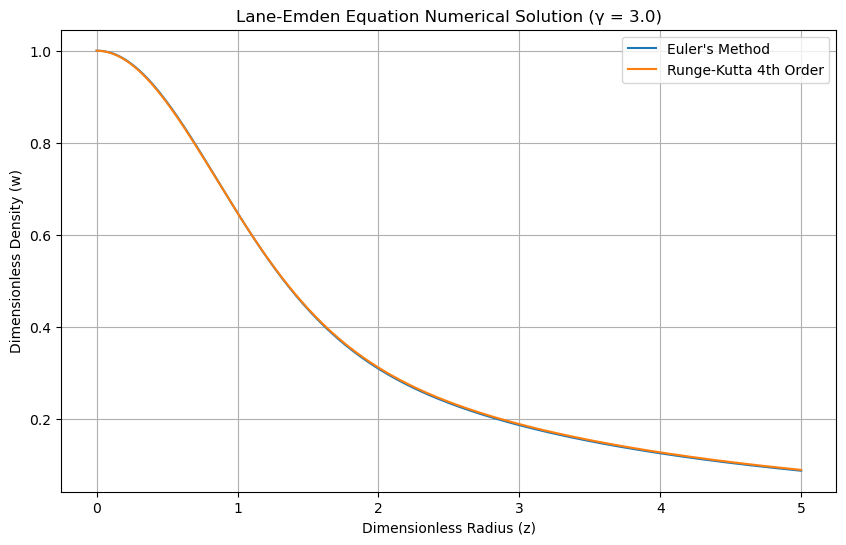

Adiabatic Exponent (γ): 1.6666666666666667
Euler's method:
Total Mass: -2.4757592667941566
Dimensionless Radius: 5.0

Runge-Kutta 4th order method:
Total Mass: -2.501533446193588
Dimensionless Radius: 5.0


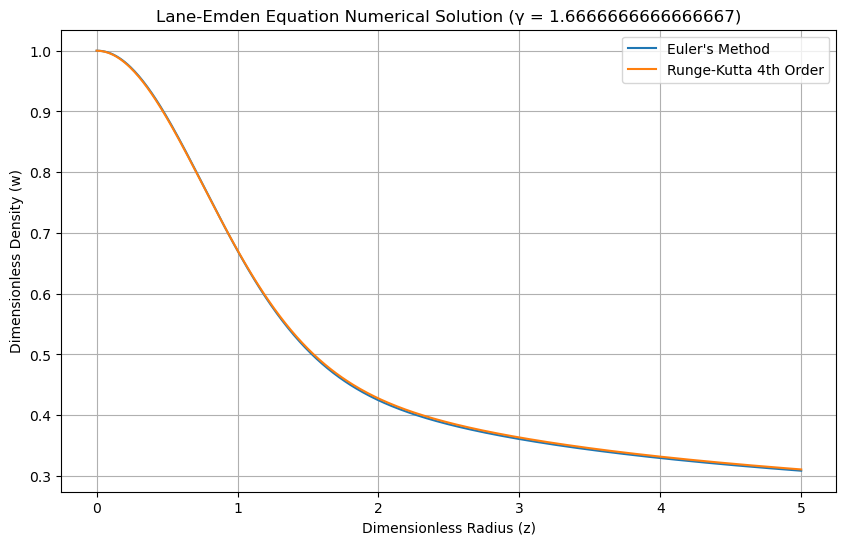

Adiabatic Exponent (γ): 1.4
Euler's method:
Total Mass: -8.21640041265824
Dimensionless Radius: 5.0

Runge-Kutta 4th order method:
Total Mass: -8.33157282161652
Dimensionless Radius: 5.0


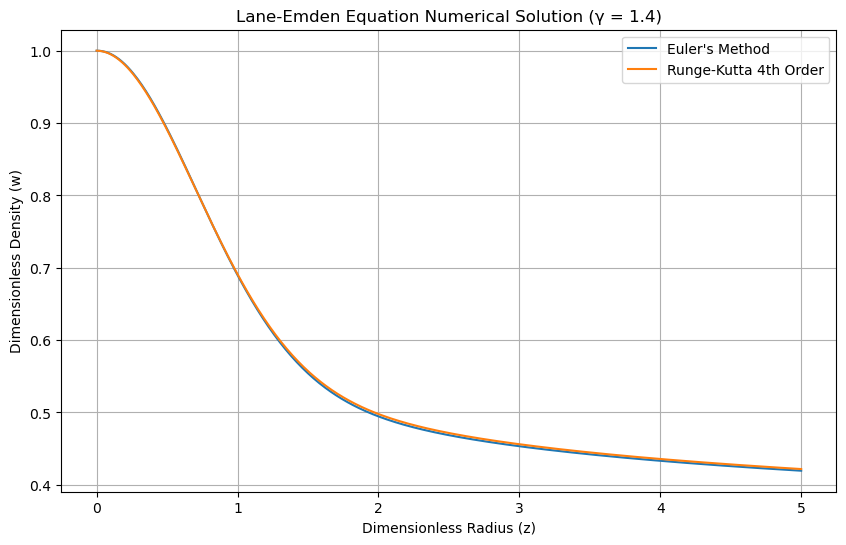

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def lane_emden_euler(w0, psi0, n, z_n, h):
    """
    Numerical solution of the Lane-Emden equation using Euler's method.

    Parameters:
        w0: Initial value of w at z=0
        psi0: Initial value of psi at z=0
        n: Polytropic index
        z_n: Dimensionless radius where the solution ends
        h: Step size

    Returns:
        z_values: Array of z values
        w_values: Array of corresponding w values
        psi_values: Array of corresponding psi values
    """
    z_values = np.arange(0, z_n + h, h)
    w_values = [w0]
    psi_values = [psi0]

    for i in range(1, len(z_values)):
        w_new = w_values[-1] + h * psi_values[-1]
        psi_new = psi_values[-1] - h * (2 * z_values[i] * psi_values[-1] + w_values[-1]**n)
        w_values.append(w_new)
        psi_values.append(psi_new)

    return z_values, w_values, psi_values

def lane_emden_rk4(w0, psi0, n, z_n, h):
    """
    Numerical solution of the Lane-Emden equation using the 4th order Runge-Kutta method.

    Parameters:
        w0: Initial value of w at z=0
        psi0: Initial value of psi at z=0
        n: Polytropic index
        z_n: Dimensionless radius where the solution ends
        h: Step size

    Returns:
        z_values: Array of z values
        w_values: Array of corresponding w values
        psi_values: Array of corresponding psi values
    """
    z_values = np.arange(0, z_n + h, h)
    w_values = [w0]
    psi_values = [psi0]

    for i in range(1, len(z_values)):
        k1w = h * psi_values[-1]
        k1psi = -h * (2 * z_values[i] * psi_values[-1] + w_values[-1]**n)

        k2w = h * (psi_values[-1] + 0.5 * k1psi)
        k2psi = -h * (2 * (z_values[i] + 0.5 * h) * (psi_values[-1] + 0.5 * k1psi) + (w_values[-1] + 0.5 * k1w)**n)

        k3w = h * (psi_values[-1] + 0.5 * k2psi)
        k3psi = -h * (2 * (z_values[i] + 0.5 * h) * (psi_values[-1] + 0.5 * k2psi) + (w_values[-1] + 0.5 * k2w)**n)

        k4w = h * (psi_values[-1] + k3psi)
        k4psi = -h * (2 * (z_values[i] + h) * (psi_values[-1] + k3psi) + (w_values[-1] + k3w)**n)

        w_new = w_values[-1] + (k1w + 2 * k2w + 2 * k3w + k4w) / 6
        psi_new = psi_values[-1] + (k1psi + 2 * k2psi + 2 * k3psi + k4psi) / 6

        w_values.append(w_new)
        psi_values.append(psi_new)

    return z_values, w_values, psi_values

def calculate_mass_radius(z_values, w_values, psi_values, n):
    """
    Calculate the total mass and dimensionless radius of the star.

    Parameters:
        z_values: Array of z values
        w_values: Array of corresponding w values
        psi_values: Array of corresponding psi values
        n: Polytropic index

    Returns:
        total_mass: Total mass of the star
        dimensionless_radius: Dimensionless radius of the star
    """
    total_mass = 4 * np.pi * psi_values[-1] * z_values[-1]**n
    dimensionless_radius = z_values[-1]

    return total_mass, dimensionless_radius

# Parameters
w0 = 1.0
psi0 = 0.0
n = 1.5  # Polytropic index
z_n = 5.0  # Dimensionless radius where the solution ends
h = 0.01  # Step size

# Euler's method
z_euler, w_euler, psi_euler = lane_emden_euler(w0, psi0, n, z_n, h)

# Runge-Kutta 4th order method
z_rk4, w_rk4, psi_rk4 = lane_emden_rk4(w0, psi0, n, z_n, h)

# Calculate total mass and dimensionless radius
total_mass_euler, dimensionless_radius_euler = calculate_mass_radius(z_euler, w_euler, psi_euler, n)
total_mass_rk4, dimensionless_radius_rk4 = calculate_mass_radius(z_rk4, w_rk4, psi_rk4, n)
'''
# Print results
print("Euler's method:")
print(f"Total Mass: {total_mass_euler}")
print(f"Dimensionless Radius: {dimensionless_radius_euler}")

print("\nRunge-Kutta 4th order method:")
print(f"Total Mass: {total_mass_rk4}")
print(f"Dimensionless Radius: {dimensionless_radius_rk4}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(z_euler, w_euler, label="Euler's Method")
plt.plot(z_rk4, w_rk4, label="Runge-Kutta 4th Order")
plt.title("Lane-Emden Equation Numerical Solution")
plt.xlabel("Dimensionless Radius (z)")
plt.ylabel("Dimensionless Density (w)")
plt.legend()
plt.grid(True)
plt.show()
'''


# Function to calculate the Lane-Emden solution for a given adiabatic exponent gamma
def calculate_lane_emden(gamma):
    n = 1 / (gamma - 1)

    # Euler's method
    z_euler, w_euler, psi_euler = lane_emden_euler(w0, psi0, n, z_n, h)

    # Runge-Kutta 4th order method
    z_rk4, w_rk4, psi_rk4 = lane_emden_rk4(w0, psi0, n, z_n, h)

    # Calculate total mass and dimensionless radius
    total_mass_euler, dimensionless_radius_euler = calculate_mass_radius(z_euler, w_euler, psi_euler, n)
    total_mass_rk4, dimensionless_radius_rk4 = calculate_mass_radius(z_rk4, w_rk4, psi_rk4, n)

    # Print results
    print(f"Adiabatic Exponent (γ): {gamma}")
    print("Euler's method:")
    print(f"Total Mass: {total_mass_euler}")
    print(f"Dimensionless Radius: {dimensionless_radius_euler}")

    print("\nRunge-Kutta 4th order method:")
    print(f"Total Mass: {total_mass_rk4}")
    print(f"Dimensionless Radius: {dimensionless_radius_rk4}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(z_euler, w_euler, label="Euler's Method")
    plt.plot(z_rk4, w_rk4, label="Runge-Kutta 4th Order")
    plt.title(f"Lane-Emden Equation Numerical Solution (γ = {gamma})")
    plt.xlabel("Dimensionless Radius (z)")
    plt.ylabel("Dimensionless Density (w)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculate and plot for different adiabatic exponents
calculate_lane_emden(3.0)
calculate_lane_emden(5/3)
calculate_lane_emden(7/5)


Adiabatic Exponent (γ): 3.0
Euler's method:
Total Mass: -0.8581434154412171
Dimensionless Radius: 5.0

Runge-Kutta 4th order method:
Total Mass: -0.866860862178576
Dimensionless Radius: 5.0


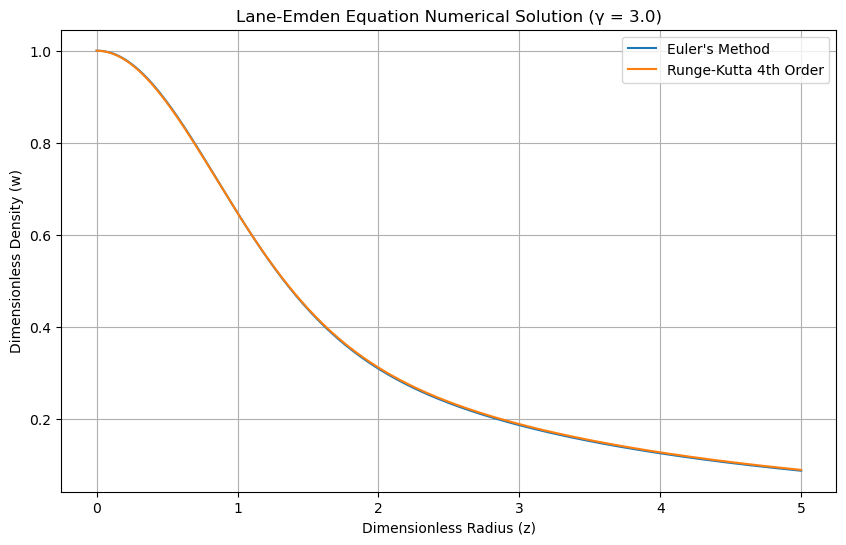

Adiabatic Exponent (γ): 1.6666666666666667
Euler's method:
Total Mass: -2.4757592667941566
Dimensionless Radius: 5.0

Runge-Kutta 4th order method:
Total Mass: -2.501533446193588
Dimensionless Radius: 5.0


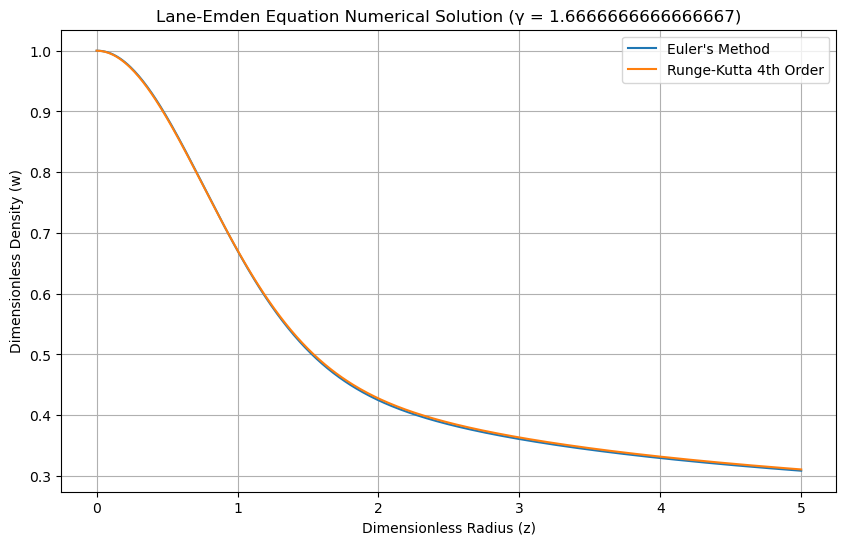

Adiabatic Exponent (γ): 1.4
Euler's method:
Total Mass: -8.21640041265824
Dimensionless Radius: 5.0

Runge-Kutta 4th order method:
Total Mass: -8.33157282161652
Dimensionless Radius: 5.0


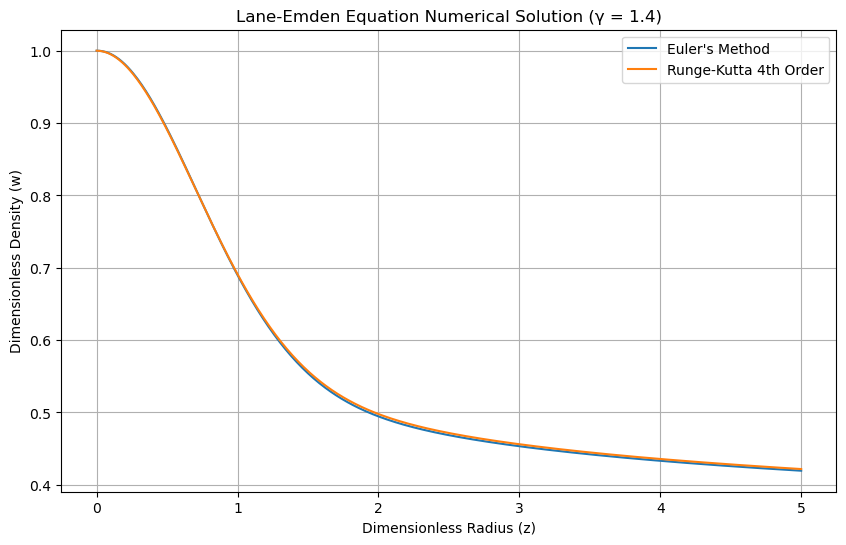

In [3]:
#copied in above
import matplotlib.pyplot as plt

# Function to calculate the Lane-Emden solution for a given adiabatic exponent gamma
def calculate_lane_emden(gamma):
    n = 1 / (gamma - 1)

    # Euler's method
    z_euler, w_euler, psi_euler = lane_emden_euler(w0, psi0, n, z_n, h)

    # Runge-Kutta 4th order method
    z_rk4, w_rk4, psi_rk4 = lane_emden_rk4(w0, psi0, n, z_n, h)

    # Calculate total mass and dimensionless radius
    total_mass_euler, dimensionless_radius_euler = calculate_mass_radius(z_euler, w_euler, psi_euler, n)
    total_mass_rk4, dimensionless_radius_rk4 = calculate_mass_radius(z_rk4, w_rk4, psi_rk4, n)

    # Print results
    print(f"Adiabatic Exponent (γ): {gamma}")
    print("Euler's method:")
    print(f"Total Mass: {total_mass_euler}")
    print(f"Dimensionless Radius: {dimensionless_radius_euler}")

    print("\nRunge-Kutta 4th order method:")
    print(f"Total Mass: {total_mass_rk4}")
    print(f"Dimensionless Radius: {dimensionless_radius_rk4}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(z_euler, w_euler, label="Euler's Method")
    plt.plot(z_rk4, w_rk4, label="Runge-Kutta 4th Order")
    plt.title(f"Lane-Emden Equation Numerical Solution (γ = {gamma})")
    plt.xlabel("Dimensionless Radius (z)")
    plt.ylabel("Dimensionless Density (w)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculate and plot for different adiabatic exponents
calculate_lane_emden(3.0)
calculate_lane_emden(5/3)
calculate_lane_emden(7/5)


# Modeling the Structure of Stars
A brief sketch of steps are follows



**1. Polytropic Equation of State:** The Lane-Emden equation arises from assuming a polytropic equation of state, which relates pressure (p) and density $(\rho)$ in the star's interior. The polytropic equation of state is given by $(p = K \rho^\gamma)$, where (K) is a constant and $\gamma$ is the adiabatic index.

**2. Lane-Emden Equation:** The Lane-Emden equation is derived by combining the polytropic equation of state with mass conservation, hydrostatic equilibrium, and Poisson's equation for the gravitational potential. The resulting Lane-Emden equation is a second-order ordinary differential equation that depends on the polytropic index $n$.

**3. Solving for Density Profile:** Solving the Lane-Emden equation numerically provides the dimensionless density profile $w(z)$ as a function of dimensionless radius $z$. This density profile represents the distribution of matter within the star.

**4. Total Mass and Radius:** From the solved Lane-Emden equation, one can calculate the total mass $M^*$ and radius $R^*$ of the star in dimensionless units. These quantities are crucial for understanding the star's overall characteristics.

**5. Analyzing Stability and Evolution:** The Lane-Emden equation helps in analyzing the stability and evolution of stars. It provides insights into how changes in parameters (e.g., mass, radius, adiabatic index) affect the structure and behavior of the star over its lifetime.


In [6]:
# Function to calculate the Lane-Emden solution for a given polytropic index
def calculate_lane_emden_sun(mass, radius, n):
    # Calculate A^2
    A_square = 4 * np.pi * G * (n + 1) * K * (mass / (4 * np.pi / 3 * radius**3))**(1/n - 1)

    # Euler's method
    z_euler, w_euler, psi_euler = lane_emden_euler(w0, psi0, n, z_n, h)

    # Runge-Kutta 4th order method
    z_rk4, w_rk4, psi_rk4 = lane_emden_rk4(w0, psi0, n, z_n, h)

    # Calculate total mass and dimensionless radius
    total_mass_euler, dimensionless_radius_euler = calculate_mass_radius(z_euler, w_euler, psi_euler, n)
    total_mass_rk4, dimensionless_radius_rk4 = calculate_mass_radius(z_rk4, w_rk4, psi_rk4, n)

    # Print results
    print(f"Modeling for the Sun (n = {n}):")
    print("Euler's method:")
    print(f"Total Mass: {total_mass_euler}")
    print(f"Dimensionless Radius: {dimensionless_radius_euler}")

    print("\nRunge-Kutta 4th order method:")
    print(f"Total Mass: {total_mass_rk4}")
    print(f"Dimensionless Radius: {dimensionless_radius_rk4}")

    # Estimate temperature in the center of the Sun
    mu = 0.62  # Mean molecular weight
    R_gas = 8.314  # Ideal gas constant

    central_density = 3 * psi_euler[-1] / (z_euler[-1] * z_n)
    temperature_center = -((mu * central_density * R_gas) / (K * (mass / (4 * np.pi / 3 * radius**3))**(1/n)))
    
    print(f"\nEstimated Temperature in the Center of the Sun: {temperature_center} K")

# Constants for the Sun
G = 6.6743e-11  # Gravitational constant (m^3 kg^(-1) s^(-2))
K = 1.380649e-23  # Boltzmann constant (m^2 kg s^(-2) K^(-1))
mass_sun = 1.989e30  # Solar mass (kg)
radius_sun = 6.9634e8  # Solar radius (m)

# Calculate and print results for the Sun
calculate_lane_emden_sun(mass_sun, radius_sun, n=3)


Modeling for the Sun (n = 3):
Euler's method:
Total Mass: -15.481815408687218
Dimensionless Radius: 5.0

Runge-Kutta 4th order method:
Total Mass: -15.73007845777891
Dimensionless Radius: 5.0

Estimated Temperature in the Center of the Sun: 3.941313366977447e+19 K


# Modeling Gas Giants (e.g., Jupiter and Saturn):

**1. Applicability of Lane-Emden for Gas Giants:** The Lane-Emden equation is also applicable to gas giants, like Jupiter and Saturn, where the internal structure is influenced by self-gravity and a polytropic equation of state.

**2. Adiabatic Index for Gas Giants:** Gas giants are often modeled with an adiabatic index of $n=1$, corresponding to $\gamma=2$. In this case, the Lane-Emden equation has an analytical solution, simplifying the modeling process.

**3. Pressure and Density Estimation:** The Lane-Emden analytical solution allows for estimating the pressure and density profiles in the center of gas giants. This information is valuable for understanding the internal conditions and behaviors of these massive planets.

**4. Comparisons with Observations:** The Lane-Emden model predictions can be compared with observational data, such as mass, radius, and atmospheric characteristics, providing a basis for refining our understanding of gas giant interiors.


Modeling for the Sun (n = 1):
Euler's method:
Total Mass: -1.4333158471128629
Dimensionless Radius: 5.0

Runge-Kutta 4th order method:
Total Mass: -1.4463322211617868
Dimensionless Radius: 5.0

Estimated Temperature in the Center of the Sun: 7.707093918041421e+17 K
Modeling for the Sun (n = 1):
Euler's method:
Total Mass: -1.4333158471128629
Dimensionless Radius: 5.0

Runge-Kutta 4th order method:
Total Mass: -1.4463322211617868
Dimensionless Radius: 5.0

Estimated Temperature in the Center of the Sun: 1.4875027579673285e+18 K


/tmp/ipykernel_46339/2113664252.py:6: RuntimeWarning: invalid value encountered in divide
  w_analytical = np.sin(z_analytical) / z_analytical


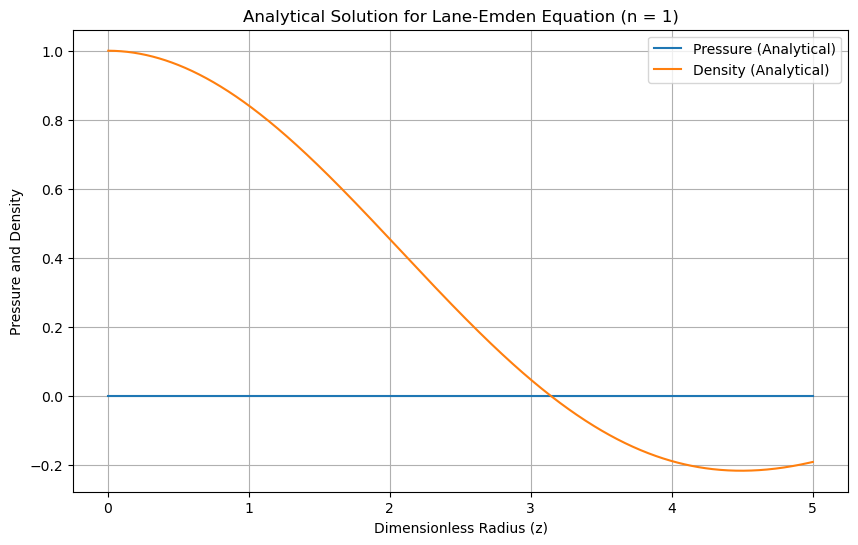

In [13]:
# Function to calculate pressure and density for a given polytropic index using the Lane-Emden analytical solution
def calculate_pressure_density_analytical(n):
    # Analytical solution for Lane-Emden equation with n=1
    if n == 1:
        z_analytical = np.linspace(0, z_n, 1000)
        w_analytical = np.sin(z_analytical) / z_analytical

        # Calculate pressure and density
        pressure_analytical = K * w_analytical**(1 + 1/n)
        density_analytical = w_analytical**n

        # Plot analytical solution
        plt.figure(figsize=(10, 6))
        plt.plot(z_analytical, pressure_analytical, label="Pressure (Analytical)")
        plt.plot(z_analytical, density_analytical, label="Density (Analytical)")
        plt.title("Analytical Solution for Lane-Emden Equation (n = 1)")
        plt.xlabel("Dimensionless Radius (z)")
        plt.ylabel("Pressure and Density")
        plt.legend()
        plt.grid(True)
        plt.show()

    else:
        print("Analytical solution is available only for n = 1 (γ = 2).")

# Constants for gas giants (Jupiter and Saturn)
mass_jupiter = 1.898e27  # Jupiter's mass (kg)
radius_jupiter = 6.9911e7  # Jupiter's radius (m)
mass_saturn = 5.683e26  # Saturn's mass (kg)
radius_saturn = 5.8232e7  # Saturn's radius (m)

# Calculate and print results for gas giants
calculate_lane_emden_sun(mass_jupiter, radius_jupiter, n=1)
calculate_lane_emden_sun(mass_saturn, radius_saturn, n=1)

# Analytical solution for n=1
calculate_pressure_density_analytical(n=1)
